<a href="https://colab.research.google.com/github/KhotShraddha27/ComputerVision/blob/main/cv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Install the ultralytics library
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s eta 0:00:00



image 1/1 /content/drive/MyDrive/obj_detection/obj_detection.jpg: 416x640 6 persons, 338.4ms
Speed: 15.7ms preprocess, 338.4ms inference, 34.7ms postprocess per image at shape (1, 3, 416, 640)


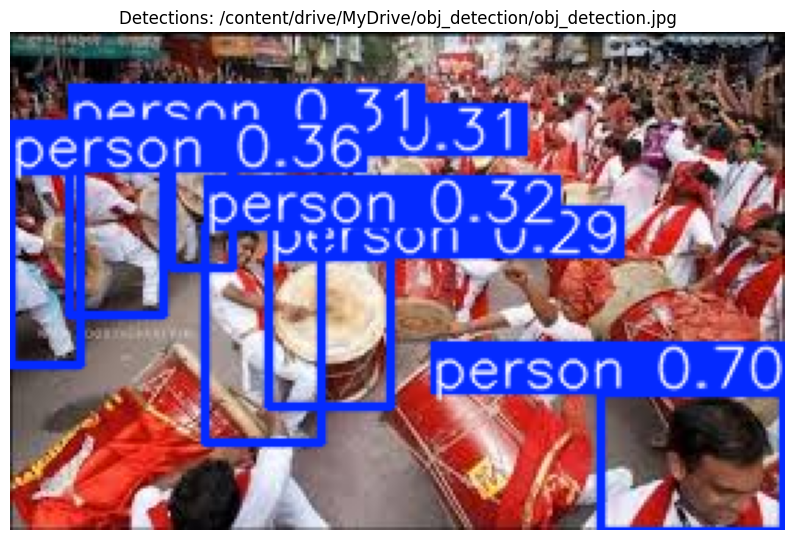

In [6]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import glob

model = YOLO('yolov8n.pt')

def run_yolo_on_images(image_paths):
    for img_path in image_paths:
        results = model(img_path)

        # The results object from ultralytics already contains the annotated image
        # We can directly display this result

        # If you need the raw image with drawn boxes, you can use:
        # img = cv2.imread(img_path)
        # for r in results:
        #     boxes = r.boxes
        #     for box in boxes:
        #         x1, y1, x2, y2 = map(int, box.xyxy[0])
        #         cls = int(box.cls)
        #         conf = float(box.conf)
        #         label = f"{model.names[cls]} {conf:.2f}"
        #
        #         cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        #         cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        #
        # plt.figure(figsize=(10,7))
        # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        # plt.title(f"Detections: {img_path}")
        # plt.axis('off')
        # plt.show()

        # Simpler way to display results using ultralytics' built-in plotting
        for r in results:
             im_array = r.plot()  # plot a BGR numpy array of predictions
             im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)  # convert to RGB
             plt.figure(figsize=(10,7))
             plt.imshow(im_rgb)
             plt.title(f"Detections: {img_path}")
             plt.axis('off')
             plt.show()

# Load all JPG images from a folder
# **IMPORTANT:** Replace '/content/drive/MyDrive/your_folder/' with the actual path to your image folder in Google Drive.
# Also, ensure '*.jpg' matches the file extension of your images.
custom_images = glob.glob('/content/drive/MyDrive/obj_detection/obj_detection.jpg')
run_yolo_on_images(custom_images)